<a href="https://colab.research.google.com/github/garciarubi/Grupo19-PP1/blob/main/inflacionPIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
df


,AÑO,INFLACION,PRESIDENTE
0,1943,1.10,RAMON S. CASTILLO / (JUNIO 1943) PEDRO PABLO R...
1,1944,-0.30,PEDRO PABLO RAMIREZ / (MARZO 1944) EDELMIRO FA...
2,1945,19.90,EDELMIRO FARRELL
3,1946,22.60,EDELMIRO FARRELL / (JUNIO 1946) JUAN DOMINGO P...
4,1947,22.60,JUAN DOMINGO PERON (*)
...,...,...,...
76,2019,53.55,MAURICIO MACRI
77,2020,42.02,ALBERTO FERNANDEZ
78,2021,48.41,ALBERTO FERNANDEZ
79,2022,94.80,ALBERTO FERNANDEZ


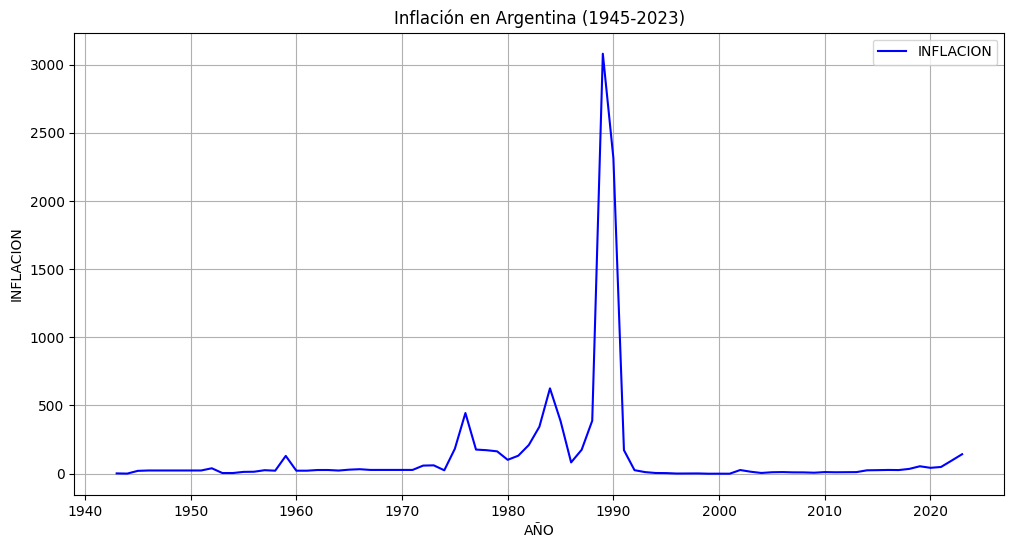

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("inflacion_argentina_43-23.csv")

# Convierte la columna 'Año' en tipo datetime
df['AÑO'] = pd.to_datetime(df['AÑO'], format='%Y')

# Graficar la inflación a lo largo de los años
plt.figure(figsize=(12, 6))
plt.plot(df['AÑO'], df['INFLACION'], label='INFLACION', color='b')
plt.xlabel("AÑO")
plt.ylabel("INFLACION")
plt.title("Inflación en Argentina (1945-2023)")
plt.grid(True)
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

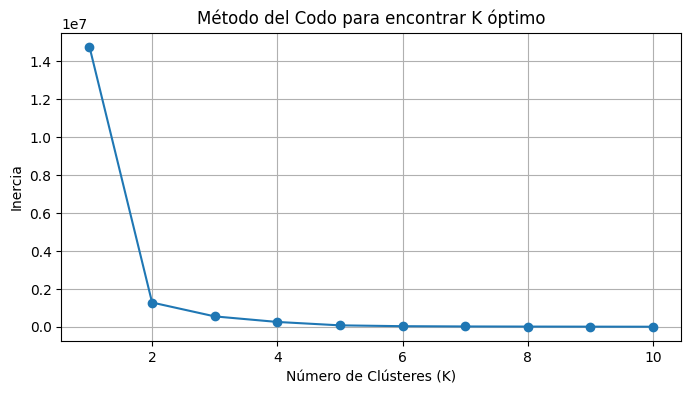

In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("inflacion_argentina_43-23.csv")

# Convierte la columna 'Año' a tipo de fecha
df['AÑO'] = pd.to_datetime(df['AÑO'], format='%Y')

# Selecciona la tasa de inflación como la característica a analizar
X = df[['INFLACION']]

# Entrena el modelo K-Means con diferentes valores de K
k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Grafica del método del codo (Elbow Method) para encontrar el número óptimo de clústeres
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar K óptimo')
plt.grid(True)
plt.show()


In [68]:
import pandas as pd
from sklearn.cluster import KMeans

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("inflacion_argentina_43-23.csv")

# Selecciona la característica a analizar (Inflación)
X = df[['INFLACION']]

# Ajusta el modelo K-Means con un valor de K igual a 2 para dividir en dos clústeres (menor y mayor inflación)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Encuentra el clúster con la menor inflación (cluster 0)
cluster_menor_inflacion = df[df['Cluster'] == 0]

# Encuentra el clúster con la mayor inflación (cluster 1)
cluster_mayor_inflacion = df[df['Cluster'] == 1]

# Encuentra el año con la menor inflación
ano_menor_inflacion = cluster_menor_inflacion['AÑO'].values[0]
presidente_menor_inflacion = cluster_menor_inflacion['PRESIDENTE'].values[0]
inflacion_menor = cluster_menor_inflacion['INFLACION'].values[0]

# Encuentra el año con la mayor inflación
ano_mayor_inflacion = cluster_mayor_inflacion['AÑO'].values[0]
presidente_mayor_inflacion = cluster_mayor_inflacion['PRESIDENTE'].values[0]
inflacion_mayor = cluster_mayor_inflacion['INFLACION'].values[0]

# Imprime los resultados
print("Año con la menor inflación desde 1945 hasta 2023:", ano_menor_inflacion)
print("Presidente en el año con la menor inflación:", presidente_menor_inflacion)
print("Valor de inflación más bajo:", inflacion_menor)

print("\nAño con la mayor inflación desde 1945 hasta 2023:", ano_mayor_inflacion)
print("Presidente en el año con la mayor inflación:", presidente_mayor_inflacion)
print("Valor de inflación más alto:", inflacion_mayor)





Año con la menor inflación desde 1945 hasta 2023: 1943
Presidente en el año con la menor inflación: RAMON S. CASTILLO / (JUNIO 1943) PEDRO PABLO RAMIREZ
Valor de inflación más bajo: 1.1

Año con la mayor inflación desde 1945 hasta 2023: 1989
Presidente en el año con la mayor inflación: RAUL ALFONSIN / (JULIO 1989) CARLOS MENEM
Valor de inflación más alto: 3079.5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("inflacion_argentina_43-23.csv")

# Convierte la columna 'Año' en tipo datetime
df['AÑO'] = pd.to_datetime(df['AÑO'], format='%Y')

# Agrupa los datos por década y calcula la media de la inflación
decada_media_inflacion = df.groupby(df['AÑO'].dt.year // 10 * 10)['INFLACION'].mean().reset_index()

# Renombra las columnas para mayor claridad
decada_media_inflacion.columns = ['Década', 'Media de Inflación']

# Imprime los resultados
print("Media de la inflación en cada década:")
print(decada_media_inflacion)


Media de la inflación en cada década:
   Década  Media de Inflación
0    1940           15.871429
1    1950           29.280000
2    1960           25.700000
3    1970          133.260000
4    1980          551.960000
5    1990          252.917000
6    2000            8.595000
7    2010           22.981000
8    2020           81.807500


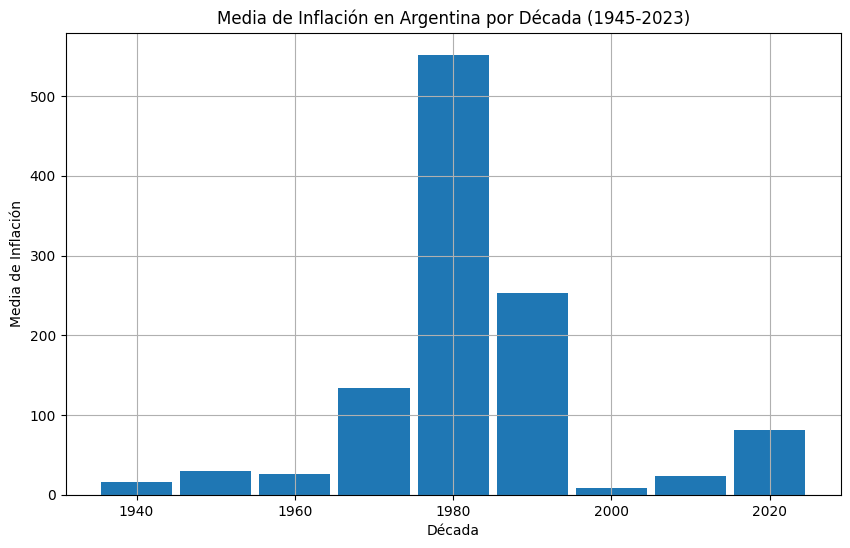

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("inflacion_argentina_43-23.csv")

# Convierte la columna 'Año' en tipo datetime
df['AÑO'] = pd.to_datetime(df['AÑO'], format='%Y')

# Calcula la década a la que pertenece cada año
df['Década'] = (df['AÑO'].dt.year // 10) * 10

# Agrupa los datos por década y calcula la media de la inflación
decada_media_inflacion = df.groupby('Década')['INFLACION'].mean().reset_index()

# Graficar la media de inflación en cada década
plt.figure(figsize=(10, 6))
plt.bar(decada_media_inflacion['Década'], decada_media_inflacion['INFLACION'], width=9, align='center')
plt.xlabel("Década")
plt.ylabel("Media de Inflación")
plt.title("Media de Inflación en Argentina por Década (1945-2023)")
plt.grid(True)
plt.show()



In [73]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("inflacion_argentina_43-23.csv")

# Convierte la columna 'Año' en tipo datetime
df['AÑO'] = pd.to_datetime(df['AÑO'], format='%Y')

# Agrupa los datos por década y calcula la media de la inflación
decada_media_inflacion = df.groupby(df['AÑO'].dt.year // 10 * 10)['INFLACION'].mean().reset_index()

# Encuentra la década con la menor inflación
decada_menor_inflacion = decada_media_inflacion[decada_media_inflacion['INFLACION'] == decada_media_inflacion['INFLACION'].min()]

# Imprime la década con la menor inflación
print("Década con la menor inflación:")
print(decada_menor_inflacion)


Década con la menor inflación:
    AÑO  INFLACION
6  2000      8.595


In [76]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("inflacion_argentina_43-23.csv")

# Convierte la columna 'Año' en tipo datetime
df['AÑO'] = pd.to_datetime(df['AÑO'], format='%Y')

# Agrupa los datos por década y calcula la media de la inflación
decada_media_inflacion = df.groupby(df['AÑO'].dt.year // 10 * 10)['INFLACION'].mean().reset_index()

# Encuentra la década con la mayor inflación
decada_mayor_inflacion = decada_media_inflacion[decada_media_inflacion['INFLACION'] == decada_media_inflacion['INFLACION'].max()]

# Imprime la década con la mayor inflación
print("Década con la mayor inflación:")
print(decada_mayor_inflacion)


Década con la mayor inflación:
    AÑO  INFLACION
4  1980     551.96


In [82]:
import pandas as pd

# Descargar el archivo Excel a Pandas DataFrame
df = pd.read_excel("Evolución_PBI_1962-2022.xlsx")

# Guardar el DataFrame como un archivo CSV
df.to_csv("PBI_1962-2022.csv", index=False)


In [83]:
df

,Año,Evolución del PIB según Banco Mundial (en pesos),Presidentes
0,1962,"24,451 mil millones","Arturo Frondizi, José María Guido"
1,1963,"18,272 mil millones","José María Guido, Arturo Umberto Illia"
2,1964,"25,605 mil millones",Arturo Umberto Illia
3,1965,"28,345 mil millones",Arturo Umberto Illia
4,1966,"28, 630 mil millones","Arturo Umberto Illia, Juan Carlos Onganía"
...,...,...,...
56,2018,"519,872 mil millones",Mauricio Macri
57,2019,"485,663 mil millones","Mauricio Macri, Alberto Fernández"
58,2020,"382,627 mil millones",Alberto Fernández
59,2021,"488,605 mil millones",Alberto Fernández


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


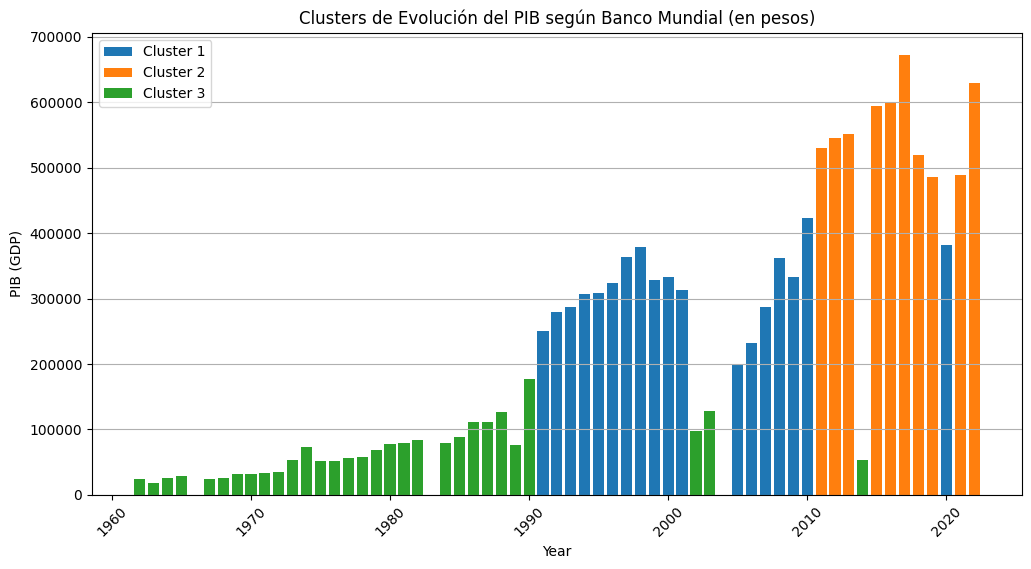

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Descargar el archivo CSV  a Pandas DataFrame
df = pd.read_csv("PBI_1962-2022.csv")


def clean_and_convert_pib(value):
    try:

        parts = value.split(" ")
        numeric_part = parts[0]

        # Convertir a float
        numeric_value = float(numeric_part.replace(",", ""))
        return numeric_value
    except:
        return None


df["Evolución del PIB según Banco Mundial (en pesos)"] = df["Evolución del PIB según Banco Mundial (en pesos)"].apply(clean_and_convert_pib)


df = df.dropna(subset=["Evolución del PIB según Banco Mundial (en pesos)"])


pib = df["Evolución del PIB según Banco Mundial (en pesos)"].values.reshape(-1, 1)


n_clusters = 3

# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pib)


df["Cluster"] = kmeans.labels_


plt.figure(figsize=(12, 6))

for cluster_id in range(n_clusters):
    cluster_data = df[df["Cluster"] == cluster_id]
    plt.bar(cluster_data["Año"], cluster_data["Evolución del PIB según Banco Mundial (en pesos)"], label=f"Cluster {cluster_id + 1}")

plt.xlabel("Year")
plt.ylabel("PIB (GDP)")
plt.title("Clusters de Evolución del PIB según Banco Mundial (en pesos)")
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


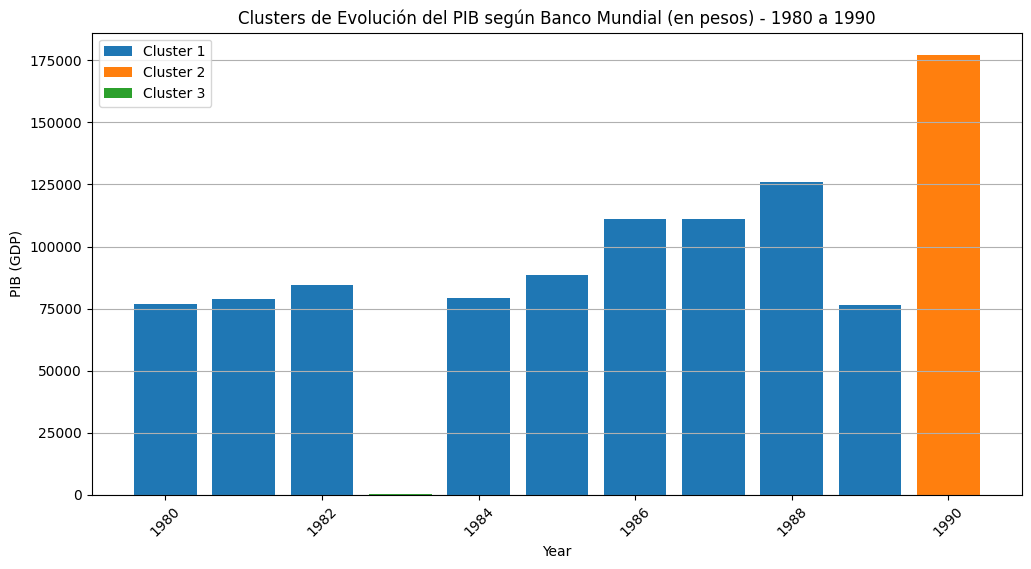

In [102]:
import pandas as pd
import matplotlib.pyplot
from sklearn.cluster import KMeans

# Descargar el archivo CSV a Pandas DataFrame
df = pd.read_csv("PBI_1962-2022.csv")

def clean_and_convert_pib(value):
    try:

        parts = value.split(" ")
        numeric_part = parts[0]

        # Convertir a float
        numeric_value = float(numeric_part.replace(",", ""))
        return numeric_value
    except:
        return None


df["Evolución del PIB según Banco Mundial (en pesos)"] = df["Evolución del PIB según Banco Mundial (en pesos)"].apply(clean_and_convert_pib)


df = df[(df["Año"] >= 1980) & (df["Año"] <= 1990)]


pib = df["Evolución del PIB según Banco Mundial (en pesos)"].values.reshape(-1, 1)

# Definir el numero de Clusters
n_clusters = 3

# Aplicar el K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pib)


df["Cluster"] = kmeans.labels_


plt.figure(figsize=(12, 6))

for cluster_id in range(n_clusters):
    cluster_data = df[df["Cluster"] == cluster_id]
    plt.bar(cluster_data["Año"], cluster_data["Evolución del PIB según Banco Mundial (en pesos)"], label=f"Cluster {cluster_id + 1}")

plt.xlabel("Year")
plt.ylabel("PIB (GDP)")
plt.title("Clusters de Evolución del PIB según Banco Mundial (en pesos) - 1980 a 1990")
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-103-7f73442e586c>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cluster"] = kmeans.labels_


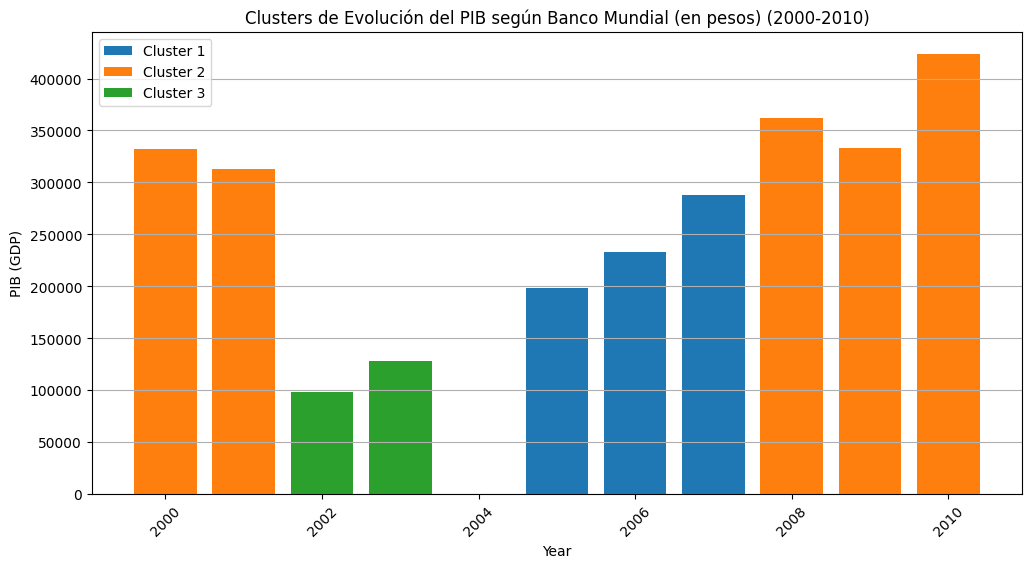

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar el archivo CSV a Pandas DataFrame
df = pd.read_csv("PBI_1962-2022.csv")

def clean_and_convert_pib(value):
    try:

        parts = value.split(" ")
        numeric_part = parts[0]


        numeric_value = float(numeric_part.replace(",", ""))
        return numeric_value
    except:
        return None


df["Evolución del PIB según Banco Mundial (en pesos)"] = df["Evolución del PIB según Banco Mundial (en pesos)"].apply(clean_and_convert_pib)


df_filtered = df[(df["Año"] >= 2000) & (df["Año"] <= 2010)]


pib = df_filtered["Evolución del PIB según Banco Mundial (en pesos)"].values.reshape(-1, 1)


n_clusters = 3

# Aplicar el K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pib)


df_filtered["Cluster"] = kmeans.labels_


plt.figure(figsize=(12, 6))

for cluster_id in range(n_clusters):
    cluster_data = df_filtered[df_filtered["Cluster"] == cluster_id]
    plt.bar(cluster_data["Año"], cluster_data["Evolución del PIB según Banco Mundial (en pesos)"], label=f"Cluster {cluster_id + 1}")

plt.xlabel("Year")
plt.ylabel("PIB (GDP)")
plt.title("Clusters de Evolución del PIB según Banco Mundial (en pesos) (2000-2010)")
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()
